# DEV 01 Project

Roll No - 045006

## NIRF RANKING OF MANAGEMENT SCHOOLS IN INDIA 2023

## ABOUT THE DATASET

In India, Government rankings for colleges and universities are released by National Institutional Ranking Framework (NIRF), which was setup in September 2015 under the Ministry of Human Resource Development (MHRD), currently known as the Ministry of Education (MoE). 

The first Government rankings for colleges and universities in India were released by NIRF in 2016.

The National Institutional Ranking Framework (NIRF) dataset is a comprehensive collection of data related to the ranking of higher education institutions in India. NIRF is an initiative by the Indian government's Ministry of Education (formerly the Ministry of Human Resource Development) to assess and rank Indian higher education institutions based on various parameters. This ranking framework was introduced to promote excellence in education and help students and parents make informed decisions about educational institutions in India.

NIRF releases Government rankings annually under the following categories:

1. Overall 
2. University 
3. Colleges 
4. Engineering 
5. Architecture 
6. Management 
7. Medical 
8. Pharmacy 
9. Law 



## PROJECT OBJECTIVES

- Design and implement a web scrapping solution for data extraction from a selected website (https://www.nirfindia.org/2023/ManagementRanking.html), followed by comprehensive data analysis.
- Assess the performance and quality of educational institutions based on scores and rankings.
- Visualize the dataset to identify trends and outliers.
- To identify any trends or patterns in the data.

## Here we are considering dataset of the Management Category 


## India Rankings 2023: Management

For that we will first scrap the data from the nirf website through web scrapping 

In [12]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import Series,DataFrame

url = 'https://www.nirfindia.org/2023/ManagementRanking.html'


result = requests.get(url)
c = result.content

soup = BeautifulSoup(c, 'html.parser')

table = soup.find('table',{'class':'table table-condensed dataTable no-footer dtr-inline'})
table = soup.find_all('table')[0]
df=pd.read_html(str(table))[0]
df

,Institute ID,Name,City,State,Score,Rank
0,IR-M-S-8890,Indian Institute of Management AhmedabadMore D...,Ahmedabad,Gujarat,83.20,1
1,IR-M-S-8903,Indian Institute of Management BangaloreMore D...,Bengaluru,Karnataka,80.89,2
2,IR-M-S-8909,Indian Institute of Management KozhikodeMore D...,Kozhikode,Kerala,76.48,3
3,IR-M-S-8972,Indian Institute of Management CalcuttaMore De...,Kolkata,West Bengal,75.53,4
4,IR-M-I-1074,Indian Institute of Technology DelhiMore Detai...,New Delhi,Delhi,74.14,5
...,...,...,...,...,...,...
95,IR-M-U-0107,Jamia HamdardMore Details |,New Delhi,Delhi,43.74,96
96,IR-M-S-14553,National Institute of Agricultural Extension M...,Hyderabad,Telangana,43.47,97
97,IR-M-S-15911,Indian Institute of ManagementMore Details |,Sirmaur,Himachal Pradesh,43.26,98
98,IR-M-C-32887,New Delhi Institute Of ManagementMore Details |,Delhi,Delhi,42.61,99


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Analysis of Dataset
### Descriptive Statsistics 


In [18]:
# Basic Statistics
average_score = df["Score"].mean()
max_score = df["Score"].max()
min_score = df["Score"].min()
total_institutions = len(df)

# State-wise Statistics
state_scores = df.groupby("State")["Score"].agg(["mean", "max", "min", "count"]).reset_index()
state_scores = state_scores.rename(columns={"mean": "Average Score", "max": "Max Score", "min": "Min Score", "count": "Institutions"})

# City-wise Statistics (Top 10 Cities)
city_scores = df.groupby("City")["Score"].agg(["mean", "max", "min", "count"]).reset_index()
city_scores = city_scores.rename(columns={"mean": "Average Score", "max": "Max Score", "min": "Min Score", "count": "Institutions"})
city_scores = city_scores.sort_values(by="Institutions", ascending=False).head(10)

# Insights
top_institution = df.iloc[0]  # Top institution
bottom_institution = df.iloc[-1]  # Bottom institution

# Print Results
print("Basic Statistics:")
print(f"Average Score: {average_score:.2f}")
print(f"Max Score: {max_score:.2f}")
print(f"Min Score: {min_score:.2f}")
print(f"Total Institutions: {total_institutions}\n")

print("State-wise Statistics:")
print(state_scores.to_string(index=False), "\n")

print("City-wise Statistics (Top 10 Cities):")
print(city_scores.to_string(index=False), "\n")

print("Insights:")
print(f"The top institution is {top_institution['Name']} in {top_institution['City']}, {top_institution['State']} with a score of {top_institution['Score']:.2f}.")
print(f"The bottom institution is {bottom_institution['Name']} in {bottom_institution['City']}, {bottom_institution['State']} with a score of {bottom_institution['Score']:.2f}.")


Basic Statistics:
Average Score: 54.27
Max Score: 83.20
Min Score: 42.13
Total Institutions: 100

State-wise Statistics:
            State  Average Score  Max Score  Min Score  Institutions
   Andhra Pradesh      52.286667      57.57      48.00             3
            Assam      44.010000      44.01      44.01             1
            Bihar      51.280000      51.28      51.28             1
       Chandigarh      46.050000      46.05      46.05             1
     Chhattisgarh      66.180000      66.18      66.18             1
            Delhi      53.335556      74.14      42.61             9
              Goa      56.280000      56.28      56.28             1
          Gujarat      56.764000      83.20      43.92             5
          Haryana      52.863333      65.88      42.13             6
 Himachal Pradesh      43.260000      43.26      43.26             1
Jammu and Kashmir      54.170000      54.17      54.17             1
        Jharkhand      57.585000      70.75      46

## Data Visualization 

### Distribution of Scores (Histogram)

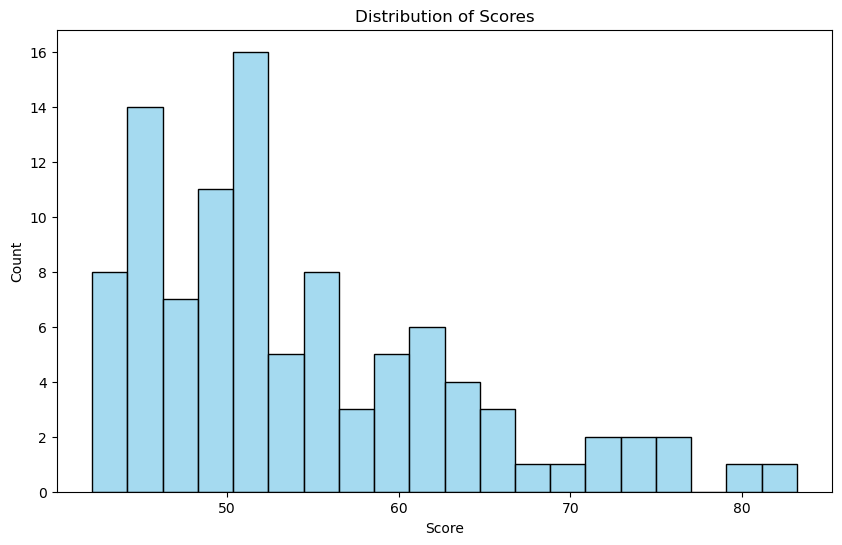

In [20]:
# Distribution of Scores (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Score", bins=20, color="skyblue")
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

### State-wise Distribution of Institutions (Barplot)

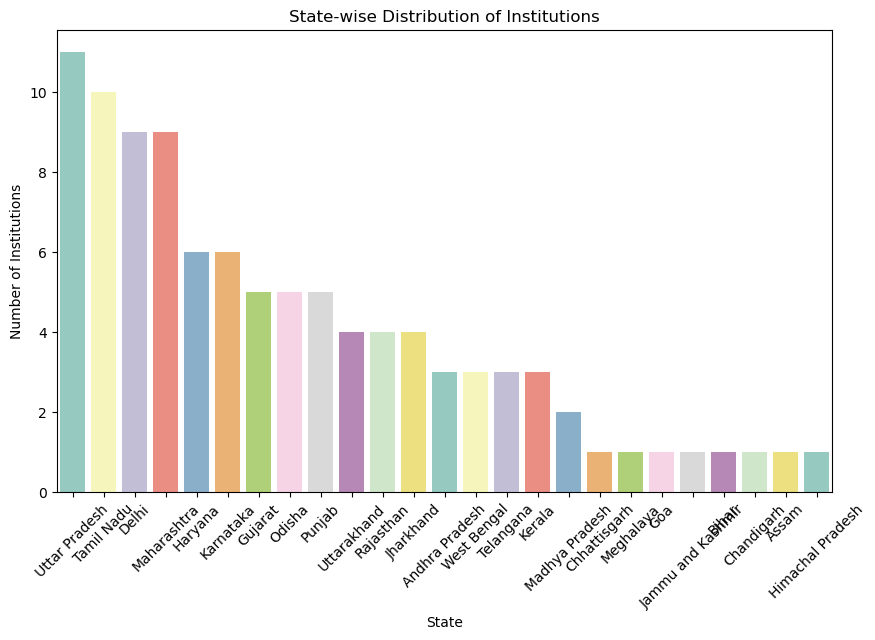

In [7]:
# State-wise Distribution of Institutions
state_counts = df["State"].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.index, y=state_counts.values, palette="Set3")
plt.xlabel('State')
plt.ylabel('Number of Institutions')
plt.title('State-wise Distribution of Institutions')
plt.xticks(rotation=45)
plt.show()

### City-wise Distribution of Institutions (Top 10 Cities)

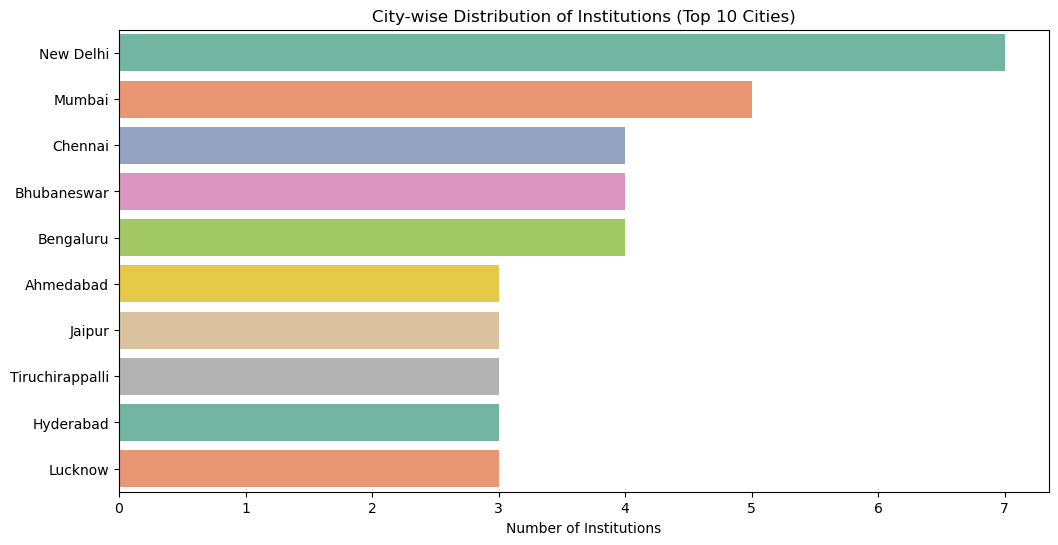

In [21]:
# City-wise Distribution of Institutions (Top 10 Cities)
city_counts = df["City"].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.values, y=city_counts.index, palette="Set2")
plt.xlabel('Number of Institutions')
plt.title('City-wise Distribution of Institutions (Top 10 Cities)')
plt.show()

### Scatter Plot of Score

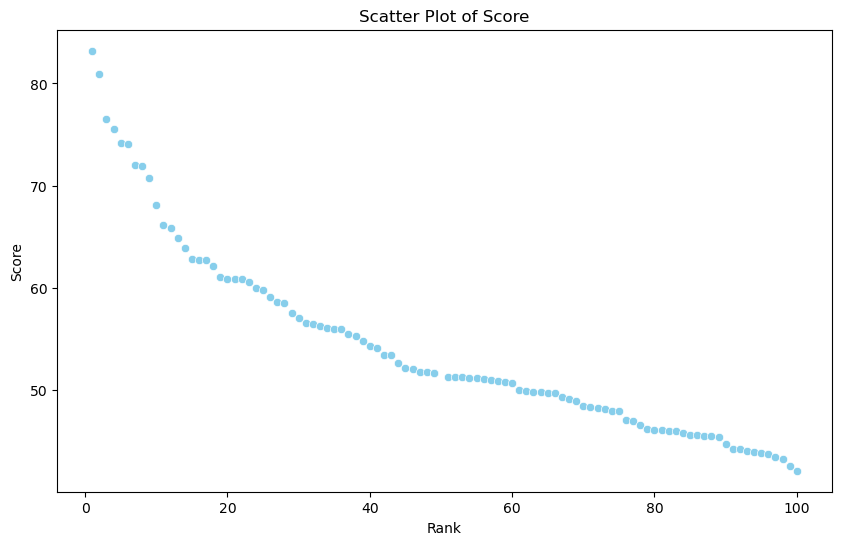

In [24]:
# Scatter Plot of Score vs. Rank
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Rank"], y=df["Score"], color="skyblue")
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Scatter Plot of Score')
plt.show()

### Line Plot of Score by Rank

Text(0.5, 1.0, 'Line Plot of Score by Rank')

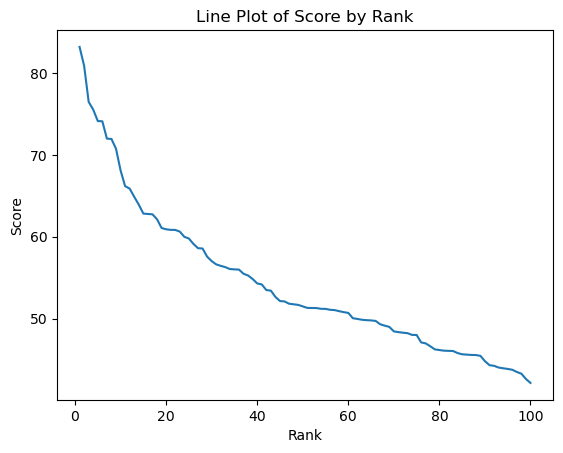

In [10]:
sns.lineplot(x=df['Rank'], y=df['Score'])

# Add labels and a title
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Line Plot of Score by Rank')

### Box Plot 

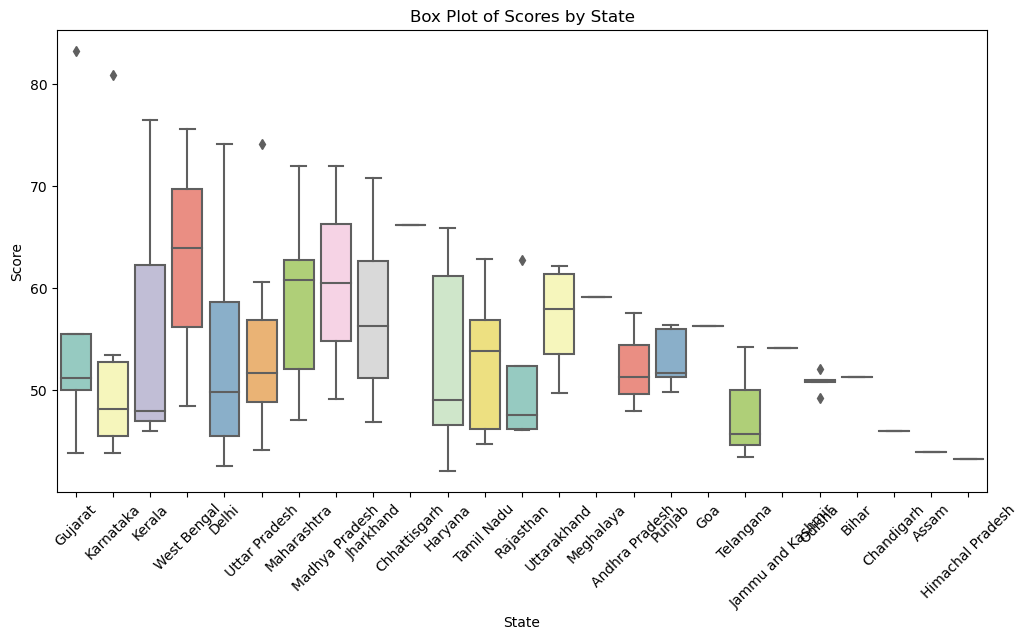

In [25]:
# Box Plot of Scores by State
plt.figure(figsize=(12, 6))
sns.boxplot(x=df["State"], y=df["Score"], palette="Set3")
plt.xlabel('State')
plt.ylabel('Score')
plt.title('Box Plot of Scores by State')
plt.xticks(rotation=45)
plt.show()

## FINDINGS AND INFERENCES


### 1. Descriptive Statsistics 

#### A. Basic Statistics:

- The average score among the institutions in the dataset is approximately 54.27.
- The highest score achieved by an institution in the dataset is 83.20.
- The lowest score among the institutions is 42.13.
- There are a total of 100 institutions in the dataset.

#### B. State-wise Statistics:

- The dataset includes institutions from various states in India.
- States like Gujarat, Maharashtra, and Tamil Nadu have multiple institutions with relatively high average scores.
- States like Uttarakhand and Jammu and Kashmir have fewer institutions but still achieve competitive scores.
- Some states have only one institution represented in the dataset.

#### C. City-wise Statistics (Top 10 Cities):

- The top 10 cities with the most educational institutions have varying average scores.
- New Delhi has the highest number of institutions (7) among the top 10 cities.
- These cities also show diversity in the range of scores, with some having a wide variation in institutional scores.

#### D. Insights:

- The top-ranked institution in the dataset is "Indian Institute of Management Ahmedabad" located in Ahmedabad, Gujarat, with a score of 83.20.
- The institution with the lowest score in the dataset is "Guru Jambheshwar University of Science and Technology" located in Hisar, Haryana, with a score of 42.13.

### 2.Data Visualization 

#### A. Distribution of Scores using Histogram

This histogram visually represents how scores are distributed among educational institutions.

- It reveals a concentration of higher scores, a right-skewed pattern, and a wide range of scores. 
- This visualization aids in decision-making for students, educators, and policymakers, motivating lower-scoring institutions to improve.

#### B. State-wise Distribution of Institutions (Barplot)

The bar plot displays the number of educational institutions in each state.

- Some states have a higher concentration of institutions, indicating a strong presence of educational infrastructure.
- States like Uttar Pradesh, Tamil Nadu, Delhi and Maharashtra appear to have a larger number of institutions.
- Other states have fewer institutions, which may suggest varying degrees of focus on higher education.
- The bar plot provides a clear visual representation of the distribution of institutions across states, offering insights into regional disparities and educational accessibility.


#### C. City-wise Distribution of Institutions (Top 10 Cities) by Barplot


The bar plot represents the number of educational institutions in the top 10 cities with the highest concentration of institutions.

- New Delhi, Mumbai has the highest number of educational institutions among the top 10 cities, indicating a strong presence of academic facilities.
- Other cities in the top 10 also host a notable number of institutions, showcasing diversity in educational opportunities.
- The distribution of institutions across cities highlights the availability of higher education options in specific urban centers.
- This bar plot offers a clear visual overview of the educational landscape in these top 10 cities, aiding stakeholders in understanding the regional distribution of institutions.


#### D. Scatter Plot of Score


The scatter plot visually represents the scores of educational institutions in the dataset.


- Each point on the scatter plot corresponds to an educational institution, with the Y-axis representing their scores.
- The scatter plot allows for the identification of patterns, clusters, or outliers within the score data.
- It helps in understanding the relationships between scores and ranks.
- Scatter plots are valuable for initial data exploration and can highlight institutions that stand out in terms of their scores.
- While this description focuses on the scatter plot's general purpose, specific insights would require context and additional data.

#### E. Line Plot of Score by Rank

The line plot displays the relationship between the ranks of educational institutions and their corresponding scores.


- In this line plot, each point represents an educational institution, with the x-axis representing their ranks and the y-axis representing their scores.
- The line plot provides a visual depiction of how scores change with respect to ranks.
- It can help in identifying any patterns or correlations between rank and score.


#### F. Box Plot of Scores by State


The box plot illustrates the distribution of scores among educational institutions, categorized by the states in which they are located.

- Each box in the plot represents the score distribution within a specific state.
- Box plots provide insights into the spread of scores, including measures such as the median, quartiles, and potential outliers within each state.
- Variations in score distributions among states can be observed, highlighting differences in educational quality or performance.
- Outliers in specific states may indicate institutions with exceptional scores compared to the state's median.
- Box plots are useful for comparing score distributions across categories (in this case, states) and identifying variations in educational performance.

## MANAGERIAL INSIGHTS



Here are some managerial insights that can be drawn from the dataset and its analyses:

1. Strategic Investment Planning:
   - Institutions located in states like Gujarat, Karnataka, and Maharashtra exhibit a high concentration. Consider allocating resources strategically in these states to leverage existing educational infrastructure and demand.

2. Targeted Marketing and Recruitment:
   - Cities like Bengaluru, Mumbai, and New Delhi are prominent educational hubs. Focus marketing efforts and student recruitment campaigns in these cities to tap into the sizable student population.

3. Quality Improvement:
   - Identify institutions with scores significantly below the state median and work on improving their educational quality to raise their scores and rankings.

4. Rank-Score Correlation:
   - Further investigate the relationship between ranks and scores. If a strong correlation exists, prioritize ranking improvement strategies as they may lead to score enhancements.

5. Outlier Analysis:
   - Investigate institutions that are outliers in terms of scores. Exceptional performers may serve as benchmarks for quality, while underperformers may require intervention.

6. Regional Disparities:
   - Acknowledge the disparities in educational infrastructure and quality across states. Consider policies to address these gaps and promote equitable access to education.

7. Collaborations and Partnerships:
   - Encourage collaborations between institutions in high-scoring states and those in states with lower scores. Knowledge sharing and partnerships can elevate educational standards.

8. Policy Formulation:
   - Utilize insights from the dataset for evidence-based policymaking in the education sector. Tailor policies to address specific challenges in different states.

9. Continuous Monitoring:
   - Establish mechanisms for continuous monitoring and evaluation of institutions' performance. Regular assessments can help identify areas for improvement.

10. Data-Driven Decision-Making:
    - Emphasize the importance of data-driven decision-making among educational institutions, policymakers, and administrators. Encourage the use of data analytics for better performance.

11. Student Guidance:
    - Provide students with information about institutions' scores and rankings to help them make informed choices about their education.

12. Competitive Analysis:
    - Institutions can use the dataset for competitive analysis, benchmarking themselves against peers to identify areas where they can excel.

These managerial insights can guide educational institutions, policymakers, and stakeholders in making informed decisions, improving educational quality, and addressing regional disparities in the Indian education landscape.